In [0]:
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import OAuthHandler
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

In [0]:
consumer_api_key = 'Ut69cqnRofEi6ItwiDHuyeXWs'
consumer_api_secret = 'zfX30MmgQT4bX9llT4iARxJoU9adsvHhvshTeu7RUhVcFkNG3L' 
access_token = '4022683452-vOWlJOMeR0rdoKAeCQKs7kVSDXExoFIzuxLt7UQ'
access_token_secret ='ZSyEnbSwH0048FUtU4r5J6B0BUYwMWkUkSQu8baubQVmz'

auth = OAuthHandler(consumer_api_key, consumer_api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, timeout = 20)

In [0]:
def remove_url(txt):

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "#lockdown -filter:retweets"

tweets_with_url = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   result_type='recent').items(1000)

tweets = [remove_url(tweet.text) for tweet in tweets_with_url]


In [165]:
sentiment = [TextBlob(tweet) for tweet in tweets]

sentiment[0].polarity, sentiment[0]


(0.0,
 TextBlob("SEE YOU SHORTLY FAM sundayschoolnairobi afirikaman fadhileemusic playkemusic instalive quarantine"))

In [166]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment]

sentiment_values[0]


[0.0,
 'SEE YOU SHORTLY FAM sundayschoolnairobi afirikaman fadhileemusic playkemusic instalive quarantine']

In [0]:
sentiment_data = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_data.head()
sentiment_data.to_csv('tweets.csv', index = False)

In [168]:
dataset = pd.read_csv('tweets.csv')
dataset.head()

,polarity,tweet
0,0.0,SEE YOU SHORTLY FAM sundayschoolnairobi afirik...
1,0.0,From Karuna to Lockdown Yadav Shramik trains p...
2,0.0,Guidelines instructions on lockdown of Jammu K...
3,0.0,MattHancock BorisJohnson Dear Bob HopeJ U S T ...
4,0.0,Animal Miike Snow covid19 lockdown run nature ...


In [0]:
#dataset_tweet = dataset['tweet']
#dataset_tweet

In [0]:
labelencoder = LabelEncoder()
dataset['tweet'] = labelencoder.fit_transform(dataset['tweet'])

In [171]:
dataset

,polarity,tweet
0,0.000000,627
1,0.000000,253
2,0.000000,277
3,0.000000,493
4,0.000000,75
...,...,...
995,0.000000,218
996,0.033333,197
997,0.500000,70
998,0.400000,405


In [172]:
for i in range(1000):
  if dataset['polarity'][i] < 0.5:
    dataset['polarity'][i] = 0
  else: 
    dataset['polarity'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [173]:
dataset

,polarity,tweet
0,0.0,627
1,0.0,253
2,0.0,277
3,0.0,493
4,0.0,75
...,...,...
995,0.0,218
996,0.0,197
997,1.0,70
998,0.0,405


In [0]:
#encoded_dataset = pd.get_dummies(dataset['polarity'])
#encoded_dataset.head()

In [0]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,:1].values


In [175]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1) 
  
tree = DecisionTreeClassifier() 
  
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test) 
  
print ("Desicion Tree using Gini Index\nAccuracy is",accuracy_score(y_test, y_pred)*100 ) 

Desicion Tree using Gini Index
Accuracy is 81.2


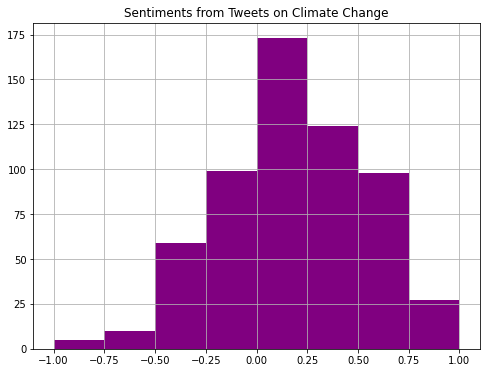

In [177]:
sentiment_data = sentiment_data[sentiment_data.polarity != 0]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_data.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()



In [0]:
import pickle

# Saving model to disk
pickle.dump(tree, open('model.pkl','wb'))

In [252]:
from google.colab import files
uploaded = files.upload()

Saving app.py to app.py


In [253]:
#!python request.py
!python app.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Traceback (most recent call last):
  File "app.py", line 40, in <module>
    app.run()
  File "/usr/local/lib/python3.6/dist-packages/flask_ngrok.py", line 88, in new_run
    old_run()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 990, in run
    run_simple(host, port, self, **options)
  File "/usr/local/lib/python3.6/dist-packages/werkzeug/serving.py", line 1052, in run_simple
    inner()
  File "/usr/local/lib/python3.6/dist-packages/werkzeug/serving.py", line 1005, in inner
    fd=fd,
  File "/usr/local/lib/python3.6/dist-packages/werkzeug/serving.py", line 848, in make_server
    host, port, app, request_handler, passthrough_errors, ssl_context, fd=fd
  File "/usr/local/lib/python3.6/dist-packages/werkzeug/serving.py", line 732, in __init__
    real_sock = socket.fromfd(fd, self.address_family, socket.SOCK_STREAM)
  File "/usr/lib/pyt